## Datenalyse: 02 Datenbeschreibung neu mit 1 Wert für jeden Tag

### 02 Datengrundlage: Wie sehen die Daten aus? 

In [1]:
import pandas as pd

df_sf = pd.read_csv('new_data_solar_flare/df_extreme.csv', sep=',')

df_sf.rename(columns={ df_sf.columns[0]: "date" }, inplace = True)
df_sf['date'] = pd.to_datetime(df_sf['date'])
df_sf.set_index('date', inplace=True)

df_sf.head()

,XRay_class_nr1
date,
1975-11-05,5.000000e-07
1975-11-06,6.000000e-07
1975-11-07,0.000000e+00
1975-11-08,0.000000e+00
1975-11-09,0.000000e+00


### 02.01 Beschreibung der Daten

In [2]:
#statistical description of the column 'sunspots'
df_sf.XRay_class_nr1.describe(include='all')

count    1.503300e+04
mean     1.425635e-05
std      7.191678e-05
min      0.000000e+00
25%      1.300000e-07
50%      1.400000e-06
75%      7.000000e-06
max      2.800000e-03
Name: XRay_class_nr1, dtype: float64

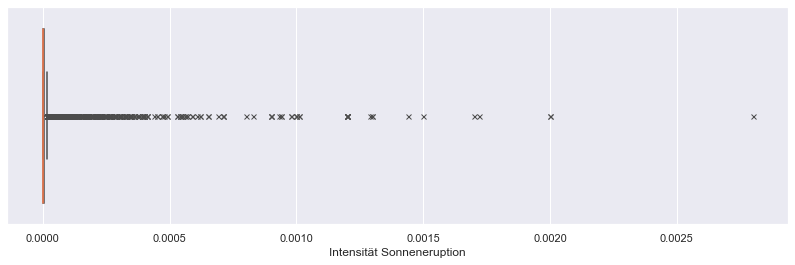

In [39]:
#Referenz: P102

import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(
    data=df_sf, x="XRay_class_nr1",
 #  notch=True,
 #   showcaps=False,
    flierprops={"marker": "x"},
    boxprops={"facecolor": (.4, .6, .8, .5)},
    medianprops={"color": "coral"},
)

sns.set(rc={"figure.figsize":(14,4)}) # Ändere die Grösse des Plots
plt.xlabel("Intensität Sonneneruption") # Setze das Label der X-Achse
plt.show() # Zeige den Plot an

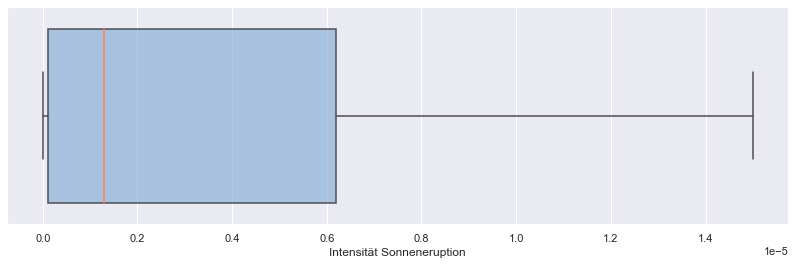

In [40]:
#Referenz: P103

import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(
    data=df_boxplot, x="XRay_class_nr1",
 #  notch=True,
 #   showcaps=False,
    flierprops={"marker": "x"},
    boxprops={"facecolor": (.4, .6, .8, .5)},
    medianprops={"color": "coral"},
    showfliers = False
)

sns.set(rc={"figure.figsize":(14,4)}) # Ändere die Grösse des Plots
plt.xlabel("Intensität Sonneneruption") # Setze das Label der X-Achse
plt.show() # Zeige den Plot an

In [3]:
count = df_sf.XRay_class_nr1.count()
mean = df_sf.XRay_class_nr1.mean()
std = df_sf.XRay_class_nr1.std()
_min = df_sf.XRay_class_nr1.min()
q_25 = df_sf.XRay_class_nr1.quantile(0.25)
q_50 = df_sf.XRay_class_nr1.quantile(0.50)
q_75 = df_sf.XRay_class_nr1.quantile(0.75)
_max = df_sf.XRay_class_nr1.max()

print("count:", count)
print("mean:", mean)
print("std:", std)
print("min:", _min)
print("1. quartile:", q_25)
print("2. quartile:", q_50)
print("3. quartile:", q_75)
print("max:", _max)

count: 15033
mean: 1.4256348366926127e-05
std: 7.191678325875334e-05
min: 0.0
1. quartile: 1.3e-07
2. quartile: 1.4e-06
3. quartile: 7e-06
max: 0.0028


In [108]:
from scipy.stats import percentileofscore

# Eine Sonneneruption der Klasse X45 entspricht dem Wert 0.0045
# hole das Perzentil des Wertes 0.0045
percentile = percentileofscore(df_sf['XRay_class_nr1'], 0.00172)

print("Der Wert 0.00172 liegt im " + str(percentile) + " Perzentil.")

Der Wert 0.00172 liegt im 99.9800439034125 Perzentil.


In [5]:
df_sf.loc[(df_sf['XRay_class_nr1']>=0.0045) & (df_sf['XRay_class_nr1']< 0.0046)]

,XRay_class_nr1
date,


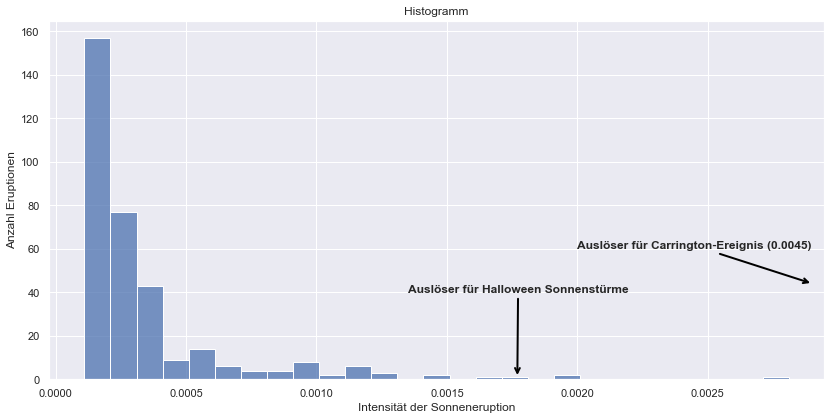

In [91]:
# Referenz: P104

import seaborn as sns
import matplotlib.pyplot as plt


# create a histogram
plt.figure(figsize=(12, 6), tight_layout=True)

start = 0.004
end = 0.0080
clrs = ['r' if x < start else '#4984b8' for x in df_sf.XRay_class_nr1[df_sf.XRay_class_nr1 > 0.0001]]

# die Breite von 10 wird genommen, damit die Verteilung besser aussieht
ax2 = sns.histplot(data=df_sf.XRay_class_nr1[df_sf.XRay_class_nr1 > 0.0001], binwidth=0.0001, legend=False)

ax2.set(title='Histogramm', xlabel='Intensität der Sonneneruption', ylabel='Anzahl Eruptionen')

#plt.legend(loc='upper right', labels=['Sonneneruptionen'])

#plt.plot(marker= 'o')

plt.annotate('Auslöser für Halloween Sonnenstürme', xy=(0.00177, 1), xytext=(0.00135, 40),
             fontsize=12, fontweight='bold', 
             arrowprops=dict(ec="black",arrowstyle='->',lw=2), zorder=4)

plt.annotate('Auslöser für Carrington-Ereignis (0.0045)', xy=(0.0029, 44), xytext=(0.002, 60),
             fontsize=12, fontweight='bold', 
             arrowprops=dict(ec="black",arrowstyle='->',lw=2), zorder=4)

plt.show()


### 02.02 Übersicht über die Intensität der Sonneneruptionen (Solar Flares) von 1975 bis 2016

##### Daten werden auf Monat aufsummiert

Nutzen dieser Grafik:
 - Sonnenzyklen sind sichtbar
 - Grober Überblick über die Daten

Problem dieser Grafik:
 - Summe des Monats sagt wenig über Sonnenstürme aus, da die Intensität einer einzelnen Sonneneruption entscheidend ist
 - Durch diese Grafik geraten "falsche" (nicht relevante) Zeitpunkte (z.B. 1990-1991) in den Fokus

In [7]:
df_sf.head()

,XRay_class_nr1
date,
1975-11-05,5.000000e-07
1975-11-06,6.000000e-07
1975-11-07,0.000000e+00
1975-11-08,0.000000e+00
1975-11-09,0.000000e+00


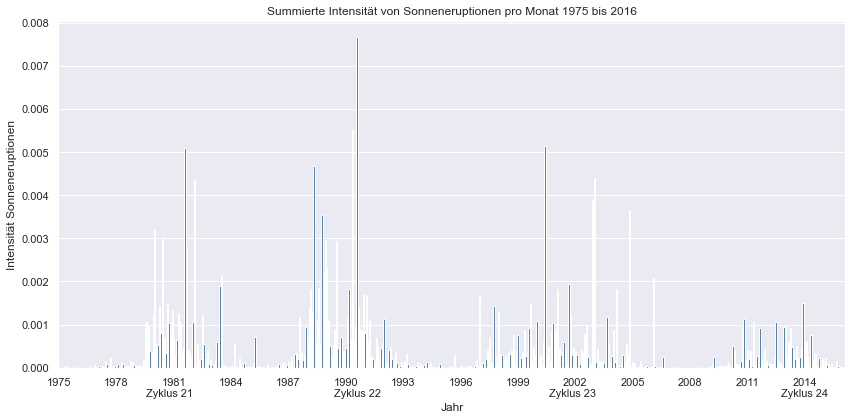

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

# take the sum of each month
df_sf_month = df_sf.resample('M').sum()

# create a barplot with beautiful colors
plt.figure(figsize=(12, 6), tight_layout=True)

ax = sns.barplot(x=df_sf_month.index, y=df_sf_month['XRay_class_nr1'], color='#4984b8', lw= 0)

ticklabels = ['']*len(df_sf_month.index)
#ticklabels[::36] = [item.strftime('%Y') for item in df_sf_month.index[::36]]
ticklabels[::36] = ['1975', '1978', '1981\nZyklus 21   ', '1984', '1987',
                     '1990\n        Zyklus 22', '1993', '1996', '1999', '2002\nZyklus 23  ', '2005',
                     '2008', '2011', '2014\nZyklus 24']

ttl = "Summierte Intensität von Sonneneruptionen pro Monat 1975 bis 2016"

ax.set(title=ttl, xlabel='Jahr', ylabel='Intensität Sonneneruptionen')

ax.xaxis.set_major_formatter(ticker.FixedFormatter(ticklabels))

plt.show()

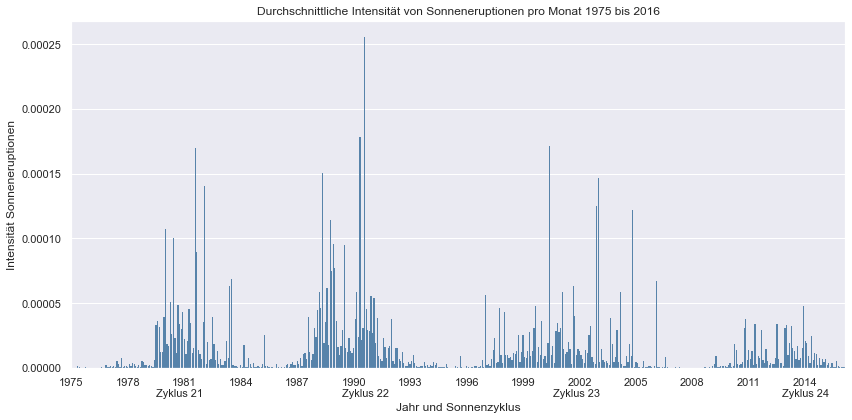

In [106]:
# Referenz P101

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

# take the sum of each month
df_sf_month = df_sf.resample('M').mean()

# create a barplot with beautiful colors
plt.figure(figsize=(12, 6), tight_layout=True)

ax = sns.barplot(x=df_sf_month.index, y=df_sf_month['XRay_class_nr1'], color='#4984b8', lw= 0)

ticklabels = ['']*len(df_sf_month.index)
#ticklabels[::36] = [item.strftime('%Y') for item in df_sf_month.index[::36]]
ticklabels[::36] = ['1975', '1978', '1981\nZyklus 21   ', '1984', '1987',
                     '1990\n        Zyklus 22', '1993', '1996', '1999', '2002\nZyklus 23  ', '2005',
                     '2008', '2011', '2014\nZyklus 24']

ttl = "Durchschnittliche Intensität von Sonneneruptionen pro Monat 1975 bis 2016"

ax.set(title=ttl, xlabel='Jahr und Sonnenzyklus', ylabel='Intensität Sonneneruptionen')

ax.xaxis.set_major_formatter(ticker.FixedFormatter(ticklabels))

plt.show()

##### Daten werden auf Woche aufsummiert
-> Nutzen und Probleme ähnlich wie bei der monatlichen Summe

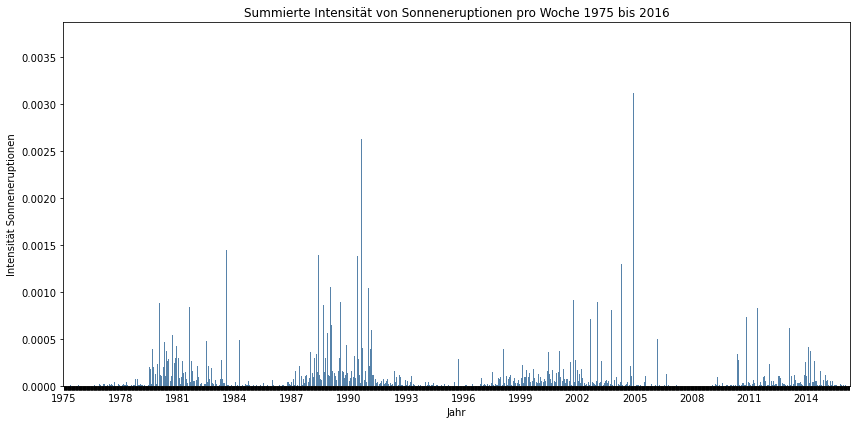

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

# take the sum of each week
df_sf_week = df_sf.resample('W').sum()

# create a barplot with beautiful colors
plt.figure(figsize=(12, 6), tight_layout=True)

ax = sns.barplot(x=df_sf_week.index, y=df_sf_week['XRay_class_nr1'], color='#4984b8')

ticklabels = ['']*len(df_sf_week.index)
ticklabels[::156] = [item.strftime('%Y') for item in df_sf_week.index[::156]]

ttl = "Summierte Intensität von Sonneneruptionen pro Woche 1975 bis 2016"

ax.set(title=ttl, xlabel='Jahr', ylabel='Intensität Sonneneruptionen')

ax.xaxis.set_major_formatter(ticker.FixedFormatter(ticklabels))

plt.show()

##### Daten werden auf Tag aufsummiert (-> keine sinnvolle Grafik aufgrund Verhältnis Zeitspanne und Detail)

Nutzen dieser Grafik:
 - Sonnenzyklen sind sichtbar
 - Zeitpunkte mit vielen und intensiven Sonneneruptionen ersichtlich

Problem dieser Grafik:
 - Für uns sind einzelne Tage entscheidend. Die Zeitspanne dieser Grafik ist zu gross,
   sodass einzelne Tage nicht richtig dargestellt werden können

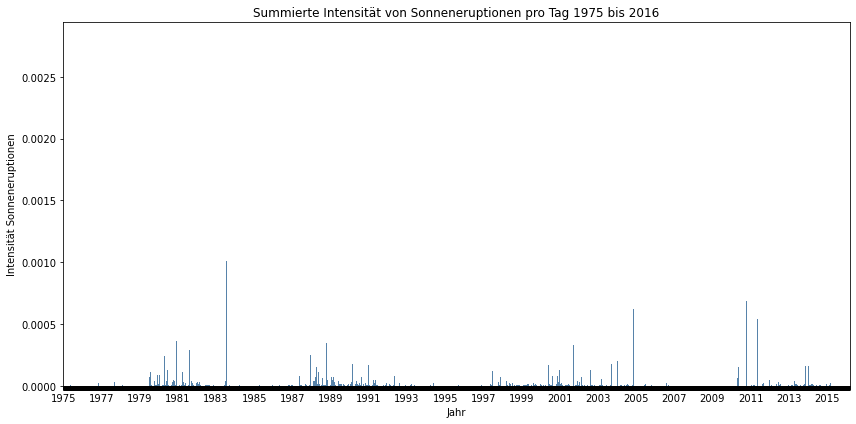

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

# take the sum of each day
df_sf_day = df_sf.resample('D').sum()

# create a barplot with beautiful colors
plt.figure(figsize=(12, 6), tight_layout=True)

ax = sns.barplot(x=df_sf_day.index, y=df_sf_day['XRay_class_nr1'], color='#4984b8')

ticklabels = ['']*len(df_sf_day.index)
ticklabels[::730] = [item.strftime('%Y') for item in df_sf_day.index[::730]]

ttl = "Summierte Intensität von Sonneneruptionen pro Tag 1975 bis 2016"

ax.set(title=ttl, xlabel='Jahr', ylabel='Intensität Sonneneruptionen')

ax.xaxis.set_major_formatter(ticker.FixedFormatter(ticklabels))

plt.show()

##### Nur Sonneneruptionen der Klasse "X" werden angezeigt (auf den Tag aufsummiert)
##### --> keine sinnvolle Grafik (Verhältnis Zeitspanne und Detail)


 Nutzen dieser Grafik:
- Einzelne Zeitpunkte mit starken Sonneneruptionen sichtbar
- die schwächeren Klassen werden nicht aufgezeigt, da diese nicht im Fokus dieser Arbeit sind

Problem dieser Grafik:
- Für uns sind einzelne Tage entscheidend. Die Zeitspanne dieser Grafik ist zu gross,
  sodass einzelne Tage nicht richtig dargestellt werden können

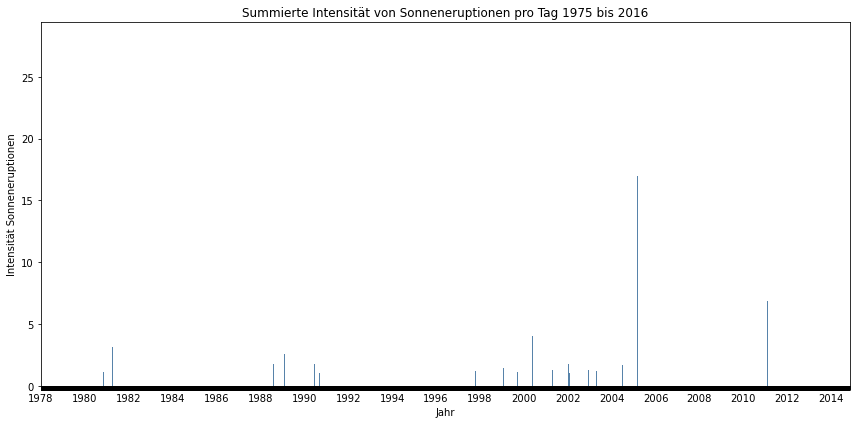

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

# use directly the intensity of the X-class
df_sf_x = df_sf[df_sf['XRay_class_nr1'] > 0.0000999] * (10 ** 4)

# take the sum of each month
df_sf_x_day = df_sf_x.resample('D').sum()

# create a barplot with beautiful colors
plt.figure(figsize=(12, 6), tight_layout=True)

ax = sns.barplot(x=df_sf_x_day.index, y=df_sf_x_day['XRay_class_nr1'], color='#4984b8')

ticklabels = ['']*len(df_sf_x_day.index)
ticklabels[::730] = [item.strftime('%Y') for item in df_sf_x_day.index[::730]]

ttl = "Summierte Intensität von Sonneneruptionen pro Tag 1975 bis 2016"

ax.set(title=ttl, xlabel='Jahr', ylabel='Intensität Sonneneruptionen')

ax.xaxis.set_major_formatter(ticker.FixedFormatter(ticklabels))

plt.show()

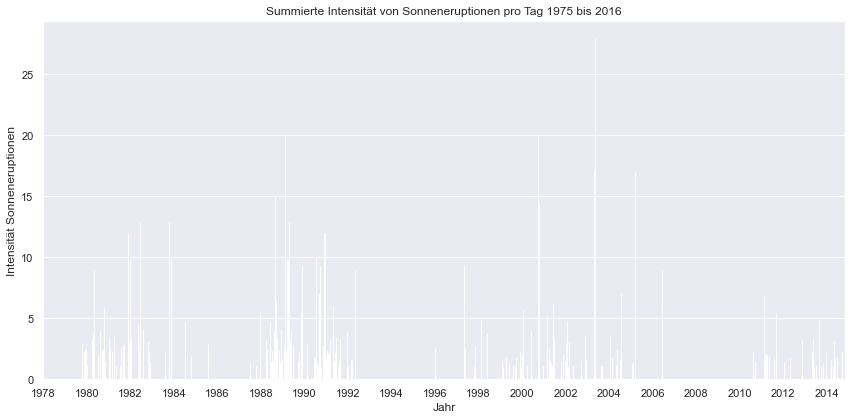

In [92]:
#Test für Halloween
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

# use directly the intensity of the X-class
df_sf_x = df_sf[df_sf['XRay_class_nr1'] > 0.0000999] * (10 ** 4)

# take the sum of each month
df_sf_x_day = df_sf_x.resample('D').sum()

# create a barplot with beautiful colors
plt.figure(figsize=(12, 6), tight_layout=True)

ax = sns.barplot(x=df_sf_x_day.index, y=df_sf_x_day['XRay_class_nr1'], color='#4984b8', lw= 0)

ticklabels = ['']*len(df_sf_x_day.index)
ticklabels[::730] = [item.strftime('%Y') for item in df_sf_x_day.index[::730]]

ttl = "Summierte Intensität von Sonneneruptionen pro Tag 1975 bis 2016"

ax.set(title=ttl, xlabel='Jahr', ylabel='Intensität Sonneneruptionen')

ax.xaxis.set_major_formatter(ticker.FixedFormatter(ticklabels))

plt.show()

##### Nur Sonneneruptionen der Klasse "X" des Jahres 1989 werden angezeigt (auf den Tag aufsummiert)

Nutzen dieser Grafik:
- Einzelne Tage mit starken Sonneneruptionen sichtbar
- Bekannte Events wie z.B. am 14.03.89 (Blackout in Quebec) ist erkennbar
- die schwächeren Klassen werden nicht aufgezeigt, da diese nicht im Fokus dieser Arbeit sind

Problem dieser Grafik:
- Zeitspanne könnte noch etwas kürzer sein, um ein einzelnes Ereignis aufzuzeigen

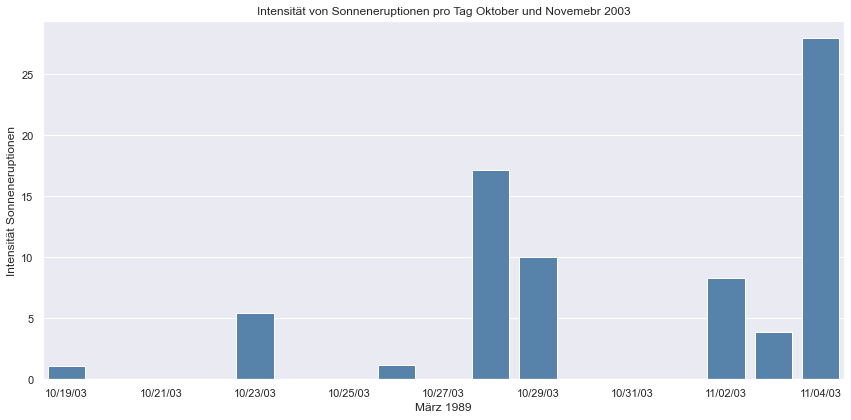

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

# use directly the intensity of the X-class
df_sf_x = df_sf[df_sf['XRay_class_nr1'] > 0.0000999] * (10 ** 4)

# take only data from March 1989
df_sf_x_03_1989 = df_sf_x[(df_sf_x.index >= '2003-10-01') & (df_sf_x.index <= '2003-11-30')]

# take the sum of each month
df_sf_x_03_1989 = df_sf_x_03_1989.resample('D').max()

# create a barplot with beautiful colors
plt.figure(figsize=(12, 6), tight_layout=True)

ax = sns.barplot(x=df_sf_x_03_1989.index, y=df_sf_x_03_1989['XRay_class_nr1'], color='#4984b8')

ticklabels = ['']*len(df_sf_x_03_1989.index)
ticklabels[::2] = [item.strftime('%D') for item in df_sf_x_03_1989.index[::2]]

ttl = "Intensität von Sonneneruptionen pro Tag Oktober und Novemebr 2003"

ax.set(title=ttl, xlabel='März 1989', ylabel='Intensität Sonneneruptionen')

ax.xaxis.set_major_formatter(ticker.FixedFormatter(ticklabels))

plt.show()

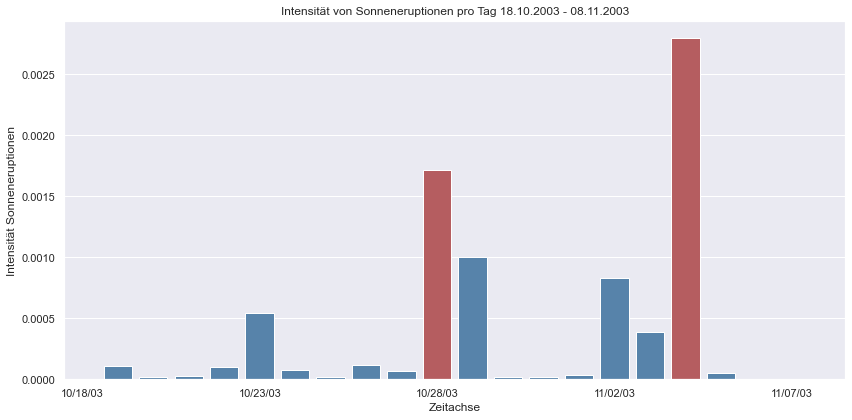

In [111]:
# Referenz: P105

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
from datetime import datetime


# take only data from March 1989
df_sf_2003 = df_sf[(df_sf.index >= '2003-10-18') & (df_sf.index <= '2003-11-08')]

# take the sum of each month
df_sf_2003 = df_sf_2003.resample('D').max()

#start = datetime.strptime('10-27-2003', '%m-%d-%Y')
#end = datetime.strptime('10-29-2003', '%m-%d-%Y')
#clrs = ['r' if x > start and x < end else '#4984b8' for x in df_sf_2003.index]

date_1 = datetime.strptime('10-28-2003', '%m-%d-%Y')
date_2 = datetime.strptime('11-04-2003', '%m-%d-%Y')

clrs = ['r' if x in (date_1, date_2) else '#4984b8' for x in df_sf_2003.index]


# create a barplot with beautiful colors
plt.figure(figsize=(12, 6), tight_layout=True)

ax = sns.barplot(x=df_sf_2003.index, y=df_sf_2003['XRay_class_nr1'], palette=clrs)

ticklabels = ['']*len(df_sf_2003.index)
ticklabels[::5] = [item.strftime('%D') for item in df_sf_2003.index[::5]]

ttl = "Intensität von Sonneneruptionen pro Tag 18.10.2003 - 08.11.2003"

ax.set(title=ttl, xlabel='Zeitachse', ylabel='Intensität Sonneneruptionen')

ax.xaxis.set_major_formatter(ticker.FixedFormatter(ticklabels))

plt.show()

In [20]:
df_sf_x = df_sf[df_sf['XRay_class_nr1'] > 0.0000999] * (10 ** 4)

#df_sf_x['XRay_class_nr1'] = df_sf_x['XRay_class_nr1']


t_test = df_sf_x.sort_values(by=['XRay_class_nr1'])

t_test.head()


,XRay_class_nr1
date,
1991-03-21,1.0
2004-07-17,1.0
1982-02-07,1.0
2002-08-21,1.0
2002-08-03,1.0


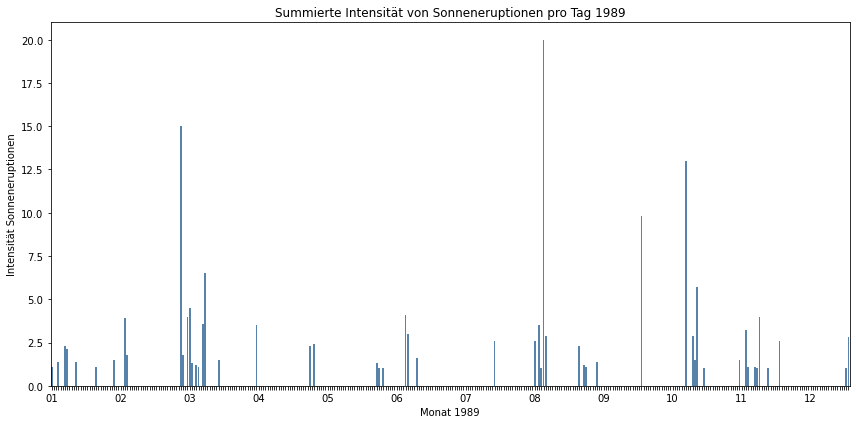

In [21]:
# Nur Sonneneruptionen der Klasse "X" des Jahres 1989 werden angezeigt (auf den Tag aufsummiert)
# Nutzen diese Grafik:
# - Einzelne Tage mit starken Sonneneruptionen sichtbar
# - Bekannte Events wie z.B. am 14.03.89 (Blackout in Quebec) ist erkennbar
# - die schwächeren Klassen werden nicht aufgezeigt, da diese nicht im Fokus dieser Arbeit sind
#
# Problem dieser Grafik:
# - Zeitspanne könnte noch etwas kürzer sein, um ein einzelnes Ereignis aufzuzeigen

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

# use directly the intensity of the X-class
df_sf_x = df_sf[df_sf['XRay_class_nr1'] > 0.0000999] * (10 ** 4)

# take only data from the year 1989
df_sf_x_day_1989 = df_sf_x[(df_sf_x.index >= '1989-01-01') & (df_sf_x.index <= '1989-12-31')]

# take the sum of each month
df_sf_x_day_1989 = df_sf_x_day_1989.resample('D').sum()

# create a barplot with beautiful colors
plt.figure(figsize=(12, 6), tight_layout=True)

ax = sns.barplot(x=df_sf_x_day_1989.index, y=df_sf_x_day_1989['XRay_class_nr1'], color='#4984b8')

ticklabels = ['']*len(df_sf_x_day_1989.index)
ticklabels[::31] = [item.strftime('%m') for item in df_sf_x_day_1989.index[::31]]

ttl = "Summierte Intensität von Sonneneruptionen pro Tag 1989"

ax.set(title=ttl, xlabel='Monat 1989', ylabel='Intensität Sonneneruptionen')

ax.xaxis.set_major_formatter(ticker.FixedFormatter(ticklabels))

plt.show()

##### Nur Sonneneruptionen der Klasse "X" des Jahres 1989 werden angezeigt (auf den Tag aufsummiert)

Nutzen dieser Grafik:
- Einzelne Tage mit starken Sonneneruptionen sichtbar
- Bekannte Events können so genau untersucht werden
- die schwächeren Klassen werden nicht aufgezeigt, da diese nicht im Fokus dieser Arbeit sind

Erkenntnisse aus dieser Grafik:
- Die Sonneneruption, welche am 14.03.1989 den Blackout in Quebec verursacht hat, ist im Vergleich
  zu anderen Sonneneruptionen gar nicht so extrem (Intensität: X11). Vermutung: Nebst der Wahrscheinlichkeit,
  dass eine starke Sonneneruption auftritt, ist vor allem auch entscheidend, ob der Sonnensturm auf die Erde
  zuströmt oder die Erde verfehlt.

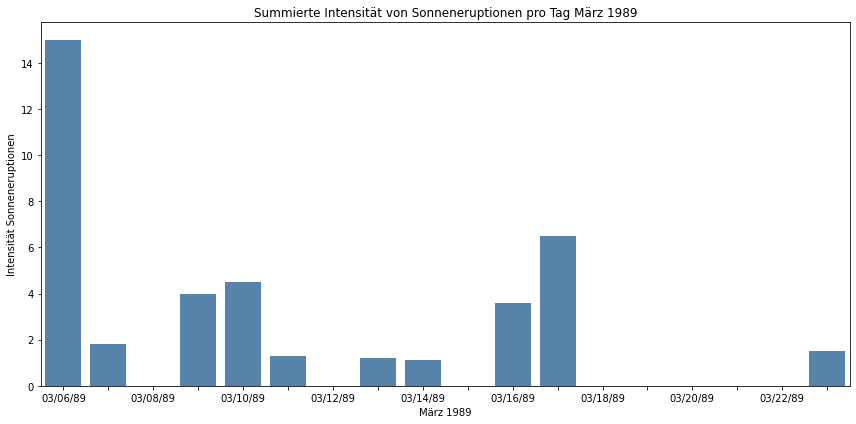

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

# use directly the intensity of the X-class
df_sf_x = df_sf[df_sf['XRay_class_nr1'] > 0.0000999] * (10 ** 4)

# take only data from March 1989
df_sf_x_03_1989 = df_sf_x[(df_sf_x.index >= '1989-03-01') & (df_sf_x.index <= '1989-03-31')]

# take the sum of each month
df_sf_x_03_1989 = df_sf_x_03_1989.resample('D').sum()

# create a barplot with beautiful colors
plt.figure(figsize=(12, 6), tight_layout=True)

ax = sns.barplot(x=df_sf_x_03_1989.index, y=df_sf_x_03_1989['XRay_class_nr1'], color='#4984b8')

ticklabels = ['']*len(df_sf_x_03_1989.index)
ticklabels[::2] = [item.strftime('%D') for item in df_sf_x_03_1989.index[::2]]

ttl = "Intensität von Sonneneruptionen pro Tag März 1989"

ax.set(title=ttl, xlabel='März 1989', ylabel='Intensität Sonneneruptionen')

ax.xaxis.set_major_formatter(ticker.FixedFormatter(ticklabels))

plt.show()

### 02.03 QQ-Plot

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

sm.qqplot(df_sf.XRay_class_nr1, line ='s')
plt.show()